<a href="https://colab.research.google.com/github/idubi-google-reichman/deep-learning-class/blob/main/Project_1_MIMIC_ido_bistry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #1 Detecting Patterns in Tabular Medical Data with MIMIC-III
You can read more about the dataset here: https://www.kaggle.com/datasets/saurabhshahane/in-hospital-mortality-prediction

Dr. Barak Or

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
my_path="/content/drive/MyDrive/Colab Notebooks/Homework/Project 1 MIMIC/"

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load the data
data = pd.read_csv(my_path+"MIMIC_data.csv")

In [4]:
print(data.head())

   group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.1625

# Q1.a
What are the mean, median, mode, and standard deviation of the age, BMI, and Blood  sodium columns in the dataset? Why are these statistics important for understanding the  data?


this are the main statiistical data. it is assential to the "feel" of the narative of data.
- the main issue with cancer is that: with age the propability to cancer is increased, it is important to know that the age is variant and the diversity is imortant.
- other issues with cancer are main health of person , and this is measured with /bmi and solt in <font color='red'>blood  🩸  </font> , which are the other metrics that are evaluated.  



----------- AGE ---------------------
Mean:  74.05522514868309
Median:  77.0
Mode:  89
Standard Deviation:  13.434060756372126
max:  99
min:  19
----------- BMI ---------------------
Mean:  30.188277651590436
Median:  28.3124741
Mode:  23.29697566
Standard Deviation:  9.325997440128406
----------- Blood sodium ---------------------
Mean:  138.89001647986404
Median:  139.25
Mode:  140.0
Standard D_sodiumeviation:  4.151346613012863



 ---------- Age graph -------------- 


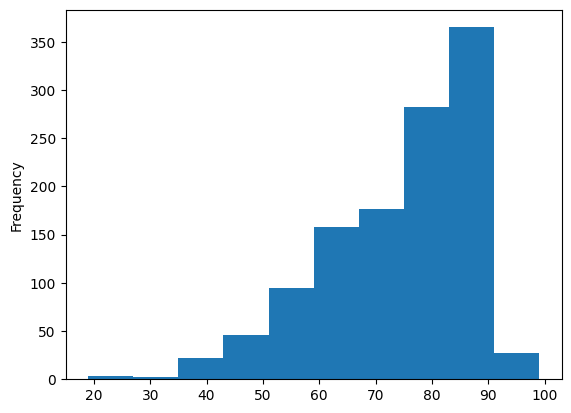

 ---------- BMI graph -------------- 


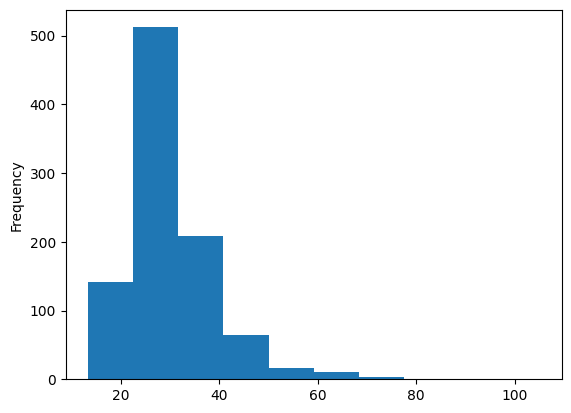

 ---------- Blood sodium graph -------------- 


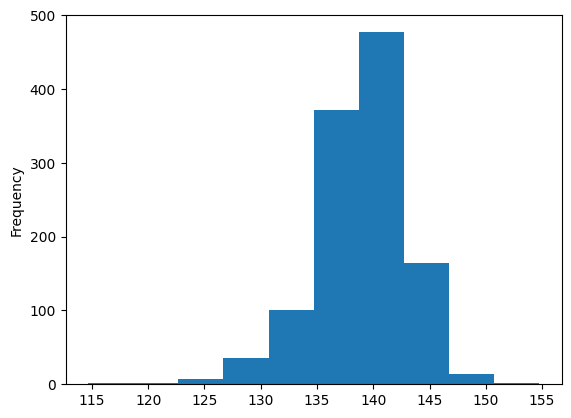

In [9]:
_age = data["age"]
_bmi = data["BMI"]
_sodium = data["Blood sodium"]

print("----------- AGE ---------------------")
print("Mean: ", _age.mean())
print("Median: ", _age.median())
print("Mode: ", _age.mode()[0])
print("Standard Deviation: ", _age.std())
print("max: ", _age.max())
print("min: ", _age.min())

print("----------- BMI ---------------------")
print("Mean: ", _bmi.mean())
print("Median: ", _bmi.median())
print("Mode: ", _bmi.mode()[0])
print("Standard Deviation: ", _bmi.std())
print("----------- Blood sodium ---------------------")
print("Mean: ", _sodium.mean())
print("Median: ", _sodium.median())
print("Mode: ", _sodium.mode()[0])
print("Standard D_sodiumeviation: ", _sodium.std())

print("\n\n\n ---------- Age graph -------------- ")
_age.plot.hist()
plt.show()

print(" ---------- BMI graph -------------- ")
_bmi.plot.hist()
plt.show()

print(" ---------- Blood sodium graph -------------- ")
_sodium.plot.hist()
plt.show()


Q1.b
How do the distributions of age, BMI, and Blood sodium look in the dataset? What can we learn from these distributions about the patient population?



1. **AGE** - looks like the main population is of elder people - the most common value is 89 , but we see that it is out of te standard deviation , so it is not in the right age scatter of distribution - this is not normal graph

2. **BMI** and **Blood sodium** are with normal distribution - both mean and median are almost the same and all are within the std range , so it is standard distribution




# Q 1.c
Use pandas and scikit-learn to drop rows with missing values in the 'BMI' and 'Blood sodium' columns, and then uses logistic regression, SVM, kNN, and decision tree to predict an 'outcome' based on the features 'age', 'BMI', and 'Blood sodium'. Ensure to split the data using train_test_split with a 20% test size and a random state of 42. Finally, fit the model, make predictions on the test set, and print a report of the best model (“classification_report”). Explain the result of the confusion matrix for the best model (“classification_report”). Explain the result of the confusion matrix for the best model where you mention for each cell its meaning.


In [12]:
# ------------------- INFRASTRUCTURE -----------------
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# ------------------- STATISTIC MODELS -----------------
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


metrics_dict = {
    'LOGISTIC_REGRESSION'    : LogisticRegression(),
     #  'SVM'                    : SVC(),
    'KNN'                    : KNeighborsClassifier(n_neighbors=3),
    'DECISION_TREE' : DecisionTreeClassifier()
    }

# split the data into training and testing sets.
def prepare_predictions_dict (x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    return {'x':x,'y':y,'X_train':X_train,'X_test':X_test, 'y_train': y_train, 'y_test': y_test}




def execute_metrics( prediction_dict , metric_name ):
    print(f"   --------------------------------- " )
    model = metrics_dict[metric_name]
    if metric_name == 'KNN':
      print(f"   {metric_name } (n_neighbors={model.n_neighbors} )    ")
    else:
      print(f"   {metric_name} ")

    model.fit(prediction_dict['X_train'], prediction_dict['y_train'])
    # Make predictions and evaluate the model.
    y_pred = model.predict(prediction_dict['X_test'])

    # accuracy = accuracy_score(prediction_dict['y_test'], y_pred)
    print('---------------------------------------------------------------------------')
    # print('accuracy_score : \n' ,  accuracy)
    print('classification_report : \n' ,  classification_report(prediction_dict['y_test'], y_pred))
    print('confusion_matrix : \n ' , confusion_matrix(prediction_dict['y_test'], y_pred))
    print('---------------------------------------------------------------------------')





def drop_null_values (dataset , fields_array , debuglogs = True):
    cleandata = dataset.dropna(axis=0, how='any' , inplace=False , subset=fields_array)
    debuglogs and print(f"  before delete ...  \033[1m {dataset.shape[0]}  \033[0m    rows count " )
    debuglogs and print(f"  after delete ...  \033[1m {cleandata.shape[0]}  \033[0m    rows count " )
    return cleandata


print(" ------------    Q1.c.1 ------------ " )


cleandata = drop_null_values(data, ['BMI','Blood sodium',])

BMI_rows_deleted = data['BMI'].count() - cleandata['BMI'].count()
BLOOD_SODIUM_rows_deleted =   data['Blood sodium'].count() - cleandata['Blood sodium'].count()


print(f" \033[1m {BMI_rows_deleted}  \033[0m    BMI rows deleted" )
print(f" \033[1m {BLOOD_SODIUM_rows_deleted}  \033[0m  BLOOD SODIUM rows deleted" )


print(" ------------    Q1.c.2 ------------ " )

# make sure that also age is not null an d if it is _ delete null ages
dataset_4_Q1c2 = drop_null_values(cleandata , ['age','outcome'])


# Separate features and target variable
X = dataset_4_Q1c2[['age', 'Blood sodium','BMI']]
y = dataset_4_Q1c2['outcome']


prediction_dict = prepare_predictions_dict(X,y)


for metric_name in metrics_dict:
    if metric_name == 'KNN':
      for i in range(3,6):
          metrics_dict['KNN'].n_neighbors = i
          execute_metrics( prediction_dict , metric_name )
    else:
      execute_metrics( prediction_dict , metric_name )






print(" ------------    Q1.c.3 ------------ " )









 ------------    Q1.c.1 ------------ 
  before delete ...   1177      rows count 
  after delete ...   962      rows count 
  0      BMI rows deleted
  215    BLOOD SODIUM rows deleted
 ------------    Q1.c.2 ------------ 
  before delete ...   962      rows count 
  after delete ...   962      rows count 
   --------------------------------- 
   LOGISTIC_REGRESSION 
---------------------------------------------------------------------------
classification_report : 
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       165
         1.0       0.00      0.00      0.00        28

    accuracy                           0.85       193
   macro avg       0.43      0.50      0.46       193
weighted avg       0.73      0.85      0.79       193

confusion_matrix : 
  [[165   0]
 [ 28   0]]
---------------------------------------------------------------------------
   --------------------------------- 
   KNN (n_neighbors=3 )    
--------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Q1.d
Predict BMI based on age and Blood sodium with linear regression, SVM regressor, Decision tree regressor, and kNN refressor. Calculate RMSE, MSE, R-squared.
Split where 20% left for the test, random state=42.

# Q2.a

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Q2.b
Apply K-means clustering to the dataset to group patients based on age, BMI, diabetes, and heart rate. Cluster to 2,3,4,5, and 6 groups. What are Silhouette and Davies-Bouldin Score for each case?

#Q3.a
Describe the steps involved in training a neural network, including forward propagation and backpropagation.

## Answer









# Q3.b
Explain the bias-variance trade-off in neural network performance. How does it affect model generalization?

## Answer


# Q3.c
Highlight the importance of data preprocessing, normalization, and splitting for training effective deep learning models.

## Answer


# Q3.d+e

Relevant library from tensorflow

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Ensuring data is clean and ready with all features